In [18]:
import sys
!{sys.executable} -m pip install alpha_vantage


  Using cached alpha_vantage-2.3.1-py3-none-any.whl (31 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.9/332.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 14.2 MB/s eta 0:00:00
  Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [48]:
!{sys.executable} -m pip install mplfinance

  Using cached mplfinance-0.12.9b7-py3-none-any.whl (73 kB)

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [19]:
import requests
import json
from alpha_vantage.timeseries import TimeSeries

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
api_key = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&PMC8VB4J9LD8BJW6=demo'
r = requests.get(api_key)
data = r.json()

# TimeSeries 객체 생성
ts = TimeSeries(key=api_key, output_format='pandas')

In [29]:
# 2021년 SNP500 일간 조정된 데이터 요청
symbol = 'SNP500'  # SNP500의 심볼

# 알파벤티지 API를 사용하여 데이터 요청
data_SNP, meta_data = ts.get_daily_adjusted(symbol=symbol, outputsize='full')

# 결과 출력
print(data_SNP)

            1. open   2. high  3. low  4. close  5. adjusted close  \
date                                                                 
2023-05-16   123.35  123.8600  122.45    123.46         123.460000   
2023-05-15   123.00  123.6881  122.34    123.36         123.360000   
2023-05-12   121.41  122.8600  121.11    122.84         122.840000   
2023-05-11   122.02  122.2400  120.55    120.90         120.900000   
2023-05-10   121.99  122.4900  121.10    122.02         122.020000   
...             ...       ...     ...       ...                ...   
1999-11-05    92.75   92.9400   90.19     90.25          48.458906   
1999-11-04    94.44   94.4400   90.00     91.56          49.162298   
1999-11-03    95.87   95.9400   93.50     94.37          50.671102   
1999-11-02    96.75   96.8100   93.69     94.81          50.907356   
1999-11-01    98.50   98.8100   96.37     96.75          51.949021   

             6. volume  7. dividend amount  8. split coefficient  
date                  

In [30]:
print(data_SNP.info())
print(data_SNP.columns)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5923 entries, 2023-05-16 to 1999-11-01
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   1. open               5923 non-null   float64
 1   2. high               5923 non-null   float64
 2   3. low                5923 non-null   float64
 3   4. close              5923 non-null   float64
 4   5. adjusted close     5923 non-null   float64
 5   6. volume             5923 non-null   float64
 6   7. dividend amount    5923 non-null   float64
 7   8. split coefficient  5923 non-null   float64
dtypes: float64(8)
memory usage: 416.5 KB
None
Index(['1. open', '2. high', '3. low', '4. close', '5. adjusted close',
       '6. volume', '7. dividend amount', '8. split coefficient'],
      dtype='object')


In [31]:
df_col = list(data_SNP.columns)
df_col[0].split('. ')[1]
new_col =[]
for item in df_col:
    col = item.split('. ')[1]
    new_col.append(col)
new_col

['open',
 'high',
 'low',
 'close',
 'adjusted close',
 'volume',
 'dividend amount',
 'split coefficient']

In [32]:
new_columns = ['open', 'high', 'low', 'close', 'adjusted close', 'volume', 'dividend amount', 'split coefficient']
data_SNP.columns = new_columns
data_SNP

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
date,,,,,,,,
2023-05-16,123.35,123.8600,122.45,123.46,123.460000,2749125.0,0.0,1.0
2023-05-15,123.00,123.6881,122.34,123.36,123.360000,2915725.0,0.0,1.0
2023-05-12,121.41,122.8600,121.11,122.84,122.840000,4564825.0,0.0,1.0
2023-05-11,122.02,122.2400,120.55,120.90,120.900000,3446452.0,0.0,1.0
2023-05-10,121.99,122.4900,121.10,122.02,122.020000,4189222.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1999-11-05,92.75,92.9400,90.19,90.25,48.458906,13737600.0,0.0,1.0
1999-11-04,94.44,94.4400,90.00,91.56,49.162298,16697600.0,0.0,1.0
1999-11-03,95.87,95.9400,93.50,94.37,50.671102,10369100.0,0.0,1.0


In [39]:
# 2000년부터 현재까지의 데이터를 필터링
data_SNP_20 = data_SNP[(data_SNP.index.year >= 2000)]

In [41]:
import pandas as pd

data_SNP_20.index = pd.to_datetime(data_SNP_20.index)

In [58]:
snp = pd.DataFrame()
snp['open'] = data_SNP_20['close'].resample('M').first()
snp['high'] = data_SNP_20['close'].resample('M').max()
snp['low'] = data_SNP_20['close'].resample('M').min()
snp['close'] = data_SNP_20['close'].resample('M').last()
snp['volume'] = data_SNP_20['volume'].resample('M').sum()

snp.index = pd.to_datetime(snp.index)

In [59]:
snp

,open,high,low,close,volume
date,,,,,
2000-01-31,116.00,121.50,111.56,112.25,175259600.0
2000-02-29,110.00,119.12,102.75,102.75,133524400.0
2000-03-31,100.25,126.87,100.25,118.37,194329000.0
2000-04-30,122.00,125.00,104.00,111.50,168464800.0
2000-05-31,112.00,112.00,103.00,107.31,123803200.0
...,...,...,...,...,...
2023-01-31,141.55,145.89,134.39,134.73,105576019.0
2023-02-28,135.09,137.35,129.30,129.30,76080679.0
2023-03-31,128.19,131.09,123.28,131.09,138093084.0


In [60]:
import matplotlib.pyplot as plt
import mplfinance as mpf
from mplfinance import _styles

In [61]:
def MACD(df, window_slow, window_fast, window_signal):
    macd = pd.DataFrame()
    macd['ema_slow'] = df['close'].ewm(span=window_slow).mean()
    macd['ema_fast'] = df['close'].ewm(span=window_fast).mean()
    macd['macd'] = macd['ema_slow'] - macd['ema_fast']
    macd['signal'] = macd['macd'].ewm(span=window_signal).mean()
    macd['diff'] = macd['macd'] - macd['signal']
    macd['bar_positive'] = macd['diff'].map(lambda x: x if x > 0 else 0)
    macd['bar_negative'] = macd['diff'].map(lambda x: x if x < 0 else 0)

    return macd

In [62]:
def Stochastic(df, window, smooth_window):
    stochastic = pd.DataFrame()
    stochastic['%K'] = ((df['close'] - df['low'].rolling(window).min()) \
    / (df['high'].rolling(window).max() - df['low'].rolling(window).min())) * 100
    stochastic['%D'] = stochastic['%K'].rolling(smooth_window).mean()
    stochastic['%SD'] = stochastic['%D'].rolling(smooth_window).mean()
    stochastic['UL'] = 80
    stochastic['DL'] = 20

    return stochastic

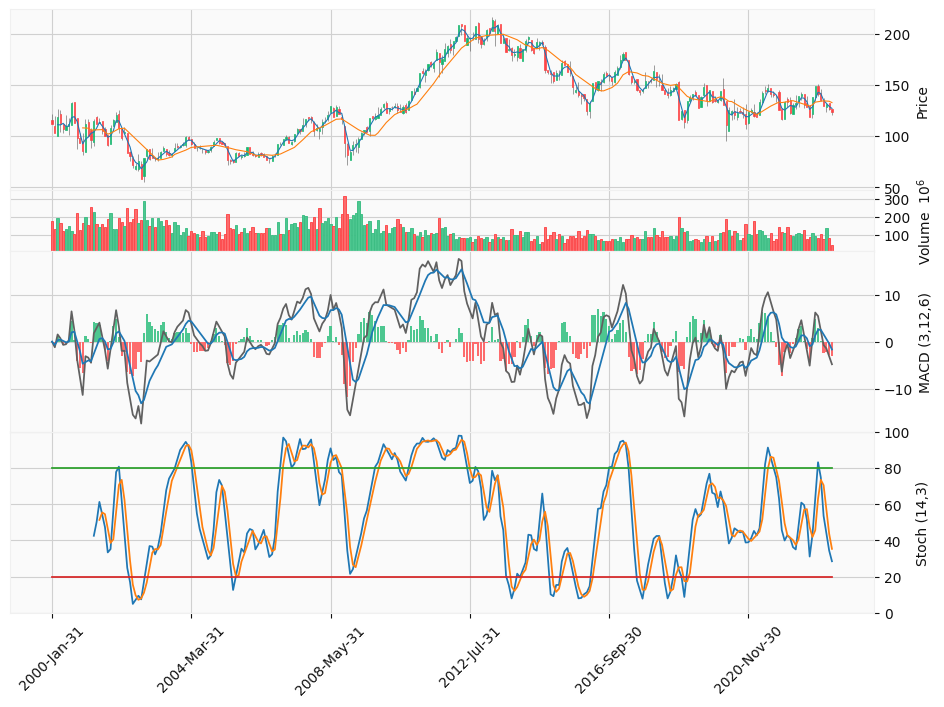

In [63]:
macd = MACD(snp, 3, 12, 6)
stochastic = Stochastic(snp, 14, 3)

plots = [
        mpf.make_addplot((macd['macd']), color='#606060', panel=2, ylabel='MACD (3,12,6)', secondary_y=False),
        mpf.make_addplot((macd['signal']), color='#1f77b4', panel=2, secondary_y=False),
        mpf.make_addplot((macd['bar_positive']), type='bar', color='#4dc790', panel=2),
        mpf.make_addplot((macd['bar_negative']), type='bar', color='#fd6b6c', panel=2),
        mpf.make_addplot((stochastic[['%D', '%SD', 'UL', 'DL']]), ylim=[0, 100], panel=3, ylabel='Stoch (14,3)')
]

mpf.plot(snp, type='candle', style='yahoo', mav=(3,12), volume=True, addplot=plots, panel_ratios=(3,1,3,3), figscale=1.5)